<a href="https://colab.research.google.com/github/RaimondDufour/workshopProgrammeren-/blob/main/20_februari_Workshop_deel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Vorige week gedaan:
- Lijst;
- Import;
- Functies;
- Regular expressions;
- Een website scrapen.

## Deze week:
- Bestand opslaan en openen;
- Text mining (*natural language processing*);

In [ ]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import gensim.summarization.summarizer as summarizer
import nltk
nltk.download('all')
nltk.download('stopwords')  
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)

## Opslaan als bestand (en dan weer openen)
Er zijn verschillende manieren, maar de beste manier is om een pandas dataframe op te slaan als csv-bestand (comma separated values).

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/sample_data/

Mounted at /content/drive
/content/sample_data


In [5]:
df = pd.read_csv('overwegingen.csv')
lijst2 = df.values.tolist()
lijst = []
for i in lijst2:
    overwegingen = i[0].strip()
    lijst.append(overwegingen)

In [16]:
lijst2 = [2,3,4,5,6]
# Lijst omzetten naar pandas dataframe:
lijstDF = pd.DataFrame(lijst2)

# opslaan dataframe:
lijstDF.to_csv('bestandsnaam.csv', encoding = 'utf-8-sig', index=False)

# Openen: 
df = pd.read_csv('bestandsnaam.csv')

# Andere bestandssoorten:
# txt (.txt)
# json (.json)
# xml (.xml)
# excel (.xlsm)

## Taal: Natural Language Processing (NLP) of text mining

## Een paar toepassingen:
* metadata destilleren;
* NER: named entity recognition;
* anomalie-detectie;
* POS (part of speech): zinsontleding;
* Sentimentanalyse;
* Samenvatten;
* Topic modelling: over welke onderwerpen gaan de teksten?
* Classification;

## Juridische toepassingen:
* analyseren (empirical legal research);
* rechters en advocaten *profilen*;
* alert-service: uitspraak over een bepaald onderwerp?
* wetgeving ondersteunen;
* document-/contractbeheer;
* documentvalidatie;
* voorspellen; 
* beslissen.
Let op: beperking ecli-database: lang niet alle uitspraken worden gepubliceerd! (10 tot 15%?). Dit betekent niet dat de database onbruikbaar is, maar wel dat je niet altijd te maken hebt met een representatieve dataset. 

## Hoe doen we dat? 
Een computer kan teksten niet begrijpen, maar wel rekenen met cijfers. Dus: strings omzetten naar getallen.

* Zoeken op woorden/regular expressions;
* Bag of words/TFIDF (term frequency - inversed document frequency);
* Taalmodellen: Aan de hand van een grote *corpus* wordt elk woord voorzien van een getal/serie getallen

## Met deze methodes:
* tellen;
* lineaire regressie (statistiek);
* machine learning (waarnemingen noteren);
* neurale netwerken. 

## Mijn theorie: 
Het is moeilijker om de juiste vraag te stellen dan om het juiste antwoord daarop te geven.

## Uitgangspunt: De computer kan geen taal begrijpen. 
Maar de computer kan wel rekenen!

We gaan daarom teksten omzetten naar getallen. Hoe doen we dat? 

Daar zijn verschillende manieren voor. 

### Een manier is: tellen van woorden. 
(Maar je zou ook zinnen kunnen tellen, of tekens.) 

Tellen gaat door middel van tokenization: elk woord (of zin, teken) is een token. 

In [26]:
# Bag of words:
def BOW(lijst, ngramMin: int = 1, :ngramMax int= 2, taal: str = "dutch", tfidf: bool = False):
    stop_words = set(stopwords.words(taal))
    if tfidf: Vec = TfidfVectorizer(ngram_range=(ngramMin,ngramMax), # to use bigrams ngram_range=(2,2)
                           stop_words=stop_words)
    else: Vec = CountVectorizer(ngram_range=(ngramMin,ngramMax), # to use bigrams ngram_range=(2,2)
                           stop_words=stop_words)
    data = Vec.fit_transform(lijst)
    return pd.DataFrame(data.toarray(),columns=Vec.get_feature_names_out())

In [25]:
# Stopwoorden: woorden die veel voorkomen, maar weinig betekenis toevoegen aan een tekst.
from nltk.corpus import stopwords
stopwoorden = stopwords.words("dutch")
print(stopwoorden)

['de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was', 'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat', 'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij', 'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog', 'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel', 'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja', 'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf', 'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere']


In [66]:
# Bag of words: per document een regel met per woord het aantal keren dat het woord voorkomt. 
zinnen = [" rechtbank vond pleidooi  advocaat maar matig goed", 
         " rechtbank vond pleidooi van de advocaat goed"]
a = BOW(zinnen, ngramMax = 3)
a.head()

,advocaat,advocaat goed,advocaat matig,advocaat matig goed,goed,matig,matig goed,pleidooi,pleidooi advocaat,pleidooi advocaat goed,pleidooi advocaat matig,rechtbank,rechtbank vond,rechtbank vond pleidooi,vond,vond pleidooi,vond pleidooi advocaat
0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1


In [30]:
# TFIDF:
b = BOW(zinnen, tfidf = True)
b.head()

,af,proceskostenveroordeling,rechtbank,spreekt,toe,verzoek,vordering,wijst
0,0.705457,0.250969,0.250969,0.000000,0.000000,0.352728,0.000000,0.501938
1,0.000000,0.334712,0.334712,0.470426,0.470426,0.000000,0.470426,0.334712


In [67]:
# Bag of words:
a = BOW(lijst, ngramMax=2,  tfidf = True)
a.head(45)



,aanbieden,aanbieden daarvan,aanbieder,aanbieder eiseres,aanbieder opnieuw,aanbieders,aanbieders aanmerking,aanbieders casinospelen,aanbieders eerste,aanbieders landbased,...,één maand,één opgewacht,één project,één uur,één werknemers,één één,éénvergunningstelsel,éénvergunningstelsel lotto,óf,óf beperking
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.022036,0.011018,0.011018,0.044072,0.011018,0.011018,0.011018,0.011018,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011018,0.011018,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Andere manier: het toekennen van een waarde aan een woord.
Niet alleen het tellen van woorden (en daar berekeningen op los te laten) kan de computer laten rekenen met taal. 

### toekennen van een waarde: Eén waarde? 
Nee, een matrix. Bijvoorbeeld een lijst: 

```
woord = ([0.135, 0.246, 1.204], 
         [0.987, 0.538, 1.902])
```

In [ ]:
import spacy
!python -m spacy download nl_core_news_lg
import nl_core_news_lg
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
# tokenizer = nltk.data.load('tokenizers/punkt/dutch.pickle')
nlp = spacy.load("nl_core_news_lg")

## Spacy: een GPT3-toepassing
Net als ChatGPT is Spacy een toepassing van GPT3: aan elk woord in een specifieke context is een vector (één of meer getallen) toegekend.

Met Spacy wordt elk woord in een string getokenized. Het tokenizen van een string levert een object op: laten we zeggen een lijst met een heleboel variabelen. 

Bijvoorbeeld: 
* het woord zelf;
* het *lemma*
* de taalkundige ontleding;
* de redekundige ontleding;
* Als het een *entiteit* is: de soort entiteit.

In [41]:
doc = nlp("""Dit vonnis is gewezen door mr. R.M. Berendsen, kantonrechter, en is in aanwezigheid van de griffier in het openbaar uitgesproken 
op 4 augustus 2021.  Grosse afgegeven aan de gemachtigde van de eisende partij d.d. 4 augustus 2021 """)

Hoe ziet de waarde van deze string eruit? 

De waarde wordt per woord berekend. Voor het woord "gewezen" (doc[3]) ziet de waardering eruit als volgt: 

In [42]:
t = doc[3]
print("de matrix (vector) voor " + str(t) + " is een lijst met " + str(len(t.vector)) + " waarden!")
print("-----------------")
print(t.vector)

de matrix (vector) voor gewezen is een lijst met 300 waarden!
-----------------
[-1.1477e-01 -1.2062e+00  6.7353e-01 -1.8027e-01  2.7379e+00 -8.2294e-01
  3.3535e+00  1.1208e+00 -7.6825e-01 -2.8557e-01  1.2372e+00 -2.1319e-01
  2.4193e-01 -1.6057e+00 -6.4984e-01 -1.0612e-01  1.8430e+00  1.3413e+00
  2.6289e+00 -1.4591e+00  5.9763e-02 -2.3906e-01 -1.9270e+00 -5.0158e+00
 -1.3336e+00  9.5708e-01 -1.3822e+00  8.5292e-01 -4.7535e-01 -1.7863e-01
  1.4502e+00 -8.3260e-01  2.6066e+00 -2.4169e+00 -1.6404e+00  8.8685e-01
 -1.7499e+00  8.1432e-01 -4.0440e+00  3.1825e-01  9.5792e-01  5.3253e-01
 -1.0055e+00  1.0824e+00  1.3143e+00  1.3700e+00  2.1982e+00 -1.9661e+00
 -3.2781e-01  1.1628e+00 -2.4512e+00  1.8712e-01  1.6489e+00 -1.0777e+00
  6.2761e-01 -1.4295e+00  4.2314e-01  8.8609e-01 -1.2441e+00  2.0226e+00
  4.1203e-01 -2.0519e+00  3.3551e-01  8.1457e-01  2.8710e+00 -2.4429e+00
  3.4470e-01 -1.1935e+00  3.2911e-01  8.7601e-01 -2.7337e+00 -1.1665e+00
  1.2667e+00  1.6321e+00  1.6117e+00  4.6450

## Wat betekenen deze waarden? 
Kort gezegd: hoe meer de waarde van twee woorden dichter bij elkaar liggen, hoe vaker ze bij elkaar in de buurt zijn gezien. 

ALs wij de waardes van verschillende woorden met elkaar vergelijken, en de 300 waarden per woord "platslaan" tot 2 waarden, dan kom je tot het volgende beeld: 

[[ 4.99007165e-01  1.65883179e+01]
 [ 7.12683296e+00 -3.53674746e+00]
 [ 1.28045826e+01  8.69705582e+00]
 [ 2.01105671e+01  1.07095577e-03]
 [ 1.33680878e+01  6.38494635e+00]
 [ 1.74505348e+01  3.06982446e+00]
 [ 1.88589287e+01 -1.02590036e+00]
 [ 6.60058308e+00 -1.28308449e+01]
 [-1.59616911e+00 -2.62555003e-01]
 [-1.13007965e+01  9.16779935e-01]
 [-5.53684521e+00 -3.85990071e+00]
 [ 6.38161421e-01 -9.46442127e+00]
 [-7.67808008e+00 -9.67170811e+00]
 [-1.02277565e+01 -2.84640741e+00]
 [-1.06265268e+01 -2.20282340e+00]
 [-1.25439329e+01 -2.40069246e+00]
 [-9.92288589e+00  8.37420881e-01]
 [-7.49792337e+00  2.33150005e+00]
 [-9.93433475e+00  6.34048510e+00]
 [-1.05930538e+01  5.65908432e+00]
 [-5.62145090e+00  1.13467798e+01]
 [ 5.62247133e+00 -1.40712671e+01]]


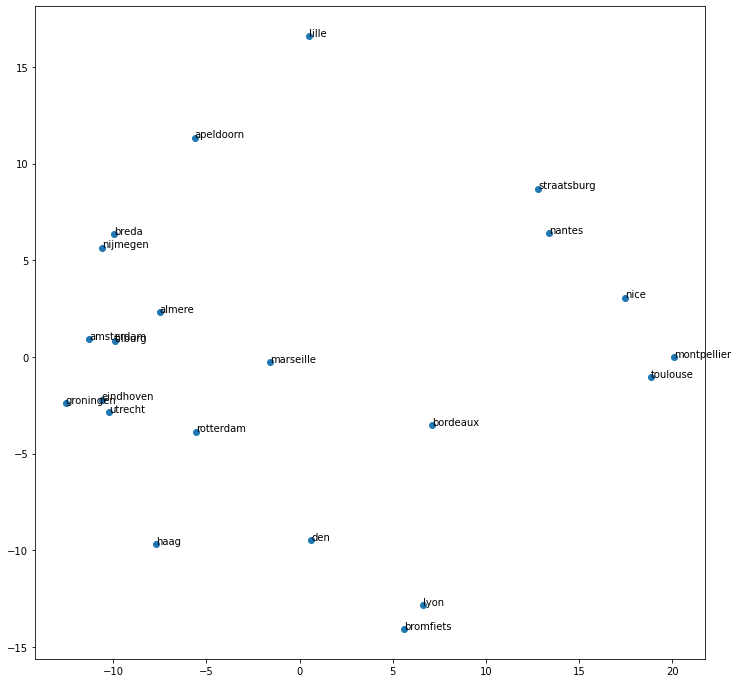

In [46]:
# tekst = "Parijs Lyon Marseille Amsterdam Tilburg Middelburg Arnhem Amersfoort Utrecht Rotterdam Bordeaux Duinkerken Nancy Montpellier Frankrijk Groningen Maastricht Breda Apeldoorn Enschede"
tekst = "Lille Bordeaux Straatsburg Montpellier Nantes Nice Toulouse Lyon Marseille Amsterdam Rotterdam Den Haag Utrecht Eindhoven Groningen Tilburg Almere Breda Nijmegen Apeldoorn Bromfiets"
text_tokens = word_tokenize(tekst.lower()) 
tokens_without_sw = [word for word in text_tokens if not word in stopwoorden]
punctuering = [',', '.', ':', ';']
tokens_zonder_punctuering = [word for word in text_tokens if not word in punctuering]
geschoond = " ".join(tokens_without_sw) 

a = nlp(geschoond)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(a.tensor)
print(result)


plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(a):
    plt.annotate(a[i].lower_, xy=(result[i, 0], result[i, 1]))
plt.show()


## POS-tagging (part of speech)
Taalkundig ontleden: werkwoorden, bijvoeglijk naamwoorden, werkwoorden etc. etc. 
Redekundige ontleding

In [51]:
doc = nlp("De rechtbank wijst het verzoek toe")
for t in doc:
    print(t, t.pos_, t.dep_)

De DET det
rechtbank NOUN nsubj
wijst VERB ROOT
het DET det
verzoek NOUN obj
toe ADP compound:prt


In [52]:
from spacy import displacy
import IPython
IPython.display.HTML(displacy.render(doc))

In [55]:
spacy.explain('prt')

'particle'

ADJ: adjective, e.g. big, old, green, incomprehensible, first
ADP: adposition, e.g. in, to, during
ADV: adverb, e.g. very, tomorrow, down, where, there
AUX: auxiliary, e.g. is, has (done), will (do), should (do)
CONJ: conjunction, e.g. and, or, but
CCONJ: coordinating conjunction, e.g. and, or, but
DET: determiner, e.g. a, an, the
INTJ: interjection, e.g. psst, ouch, bravo, hello
NOUN: noun, e.g. girl, cat, tree, air, beauty
NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
PART: particle, e.g. ’s, not,
PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
PUNCT: punctuation, e.g. ., (, ), ?
SCONJ: subordinating conjunction, e.g. if, while, that
SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 😝
VERB: verb, e.g. run, runs, running, eat, ate, eating
X: other, e.g. sfpksdpsxmsa
SPACE: space, e.g.

## Samenvatting maken à la ChatGPT
Met de vectoren van de woorden is het mogelijk om de computer zinsconstructies te laten maken. Zo kunnen samenvattingen worden gemaakt. 

In [58]:
samenTeVatten = """
Op donderdag 17 juni 2021 rijdt verdachte als bestuurder van een personenauto (merk Volkswagen) in Steenwijk vanuit de Burgemeester Voetelinkstraat de Gagelsweg op. Hij rijdt dan 
de parallelweg van de Gagelsweg in en negeert hierbij een geslotenverklaring. Hierna rijdt verdachte zonder richting aan te geven opnieuw de Gagelsweg op. Een moment later rijdt hij de 
rotonde Gagelsweg-Meppelerweg op en slaat rechtsaf richting de Meppelerweg, opnieuw zonder richting aan te geven. Verdachte verhoogt zijn snelheid en slaat linksaf de Beatrixstraat in. Hier 
verhoogt hij zijn snelheid tot minstens 80 kilometer per uur, terwijl 30 kilometer per uur is toegestaan.

Verdachte slaat daarna vanuit de Beatrixstraat zonder richting aan te geven de Kampstraat in. Hierna rijdt hij met hoge snelheid de Oostwijkstraat in en negeert hierbij opnieuw een 
geslotenverklaring. Ook vermindert verdachte zijn snelheid niet bij verschillende verkeersdrempels. Hij slaat zonder richting aan te geven de Onnostraat in en negeert daar een stopteken 
van de hem achtervolgende verbalisant. Wederom verhoogt verdachte daarna zijn snelheid ruim boven de gestelde snelheidslimiet. Enkele straten verderop rijdt hij vanaf de Molenstraat de 
parkeerplaats op van de supermarkt Coop. Hij rijdt daar met forse snelheid tussen de geparkeerde auto’s door en langs een voetganger die zich, gezien vanuit de rijrichting van de bestuurder, 
aan de linkerkant van de parkeerplaats bevindt.

Vervolgens slaat verdachte via de Scholestraat de Molenwal op. Hierbij rijdt hij een voetgangerszone in. Deze verlaat hij door met zijn voertuig tussen twee stalen buizen te rijden, de 
Oosterpoort op. Op de kruising van de Oosterpoort-Stationsstraat voegt een tweede verbalisant zich bij de achtervolging. Beiden zien een snorfiets op zijn rechterzijde liggen, tegen de 
stoeprand aan. De bestuurder van de snorfiets staat er vlak naast. Deze bestuurder verklaart dat de Volkswagen van verdachte recht op hem afkwam. Om zichzelf in veiligheid te brengen is hij 
van de snorfiets afgesprongen, waarbij hij de scooter heeft moeten laten vallen. De Volkswagen van verdachte rijdt vervolgens rakelings langs de scooter.

Verdachte vervolgt zijn weg op de Eesveenseweg en verhoogt zijn snelheid tot 120 kilometer per uur, waar 50 kilometer per uur is toegestaan. Ter hoogte van een overstreekplaats rijdt 
verdachte op de andere zijde van de weg dan de verplicht aangegeven rijrichting. Vervolgens haalt verdachte via de andere weghelft twee personenauto’s in. Hij negeert hierbij een 
doorgetrokken streep. Rijdende op de verkeerde weghelft nadert verdachte de rotonde Eesveenseweg-Middenweg. Deze rotonde rijdt hij op in de tegengestelde richting. Als gevolg van deze 
actie moeten drie automobilisten remmen en uitwijken om een botsing met verdachte te voorkomen.

Verdachte verlaat de rotonde via de Middenweg en verhoogt hier zijn snelheid ruim boven de daar geldende 30 kilometer per uur. Hij slaat linksaf de Westercluft in. Daar rijdt hij een 
grasperk op, verliest de macht over het stuur en komt al rijdend in botsing met een speeltoestel. Het lukt verdachte om na de botsing weg te rijden over het grasveld. Vervolgens zet hij 
zijn auto stil achter een blok rijtjeshuizen, stapt uit en rent weg. Kort daarna wordt hij aangehouden.

Na zijn aanhouding is bij verdachte een speekseltest afgenomen. De speekseltest gaf een positieve uitslag voor amfetamine. Ook neemt verbalisant bij verdachte wijd opengesperde ogen en 
bewegingsdrang waar. Vervolgens is bij verdachte door een arts bloed afgenomen. Uit de uitslag – vastgelegd in het rapport ‘Drugs in het verkeer’ van het Maasstad ziekenhuis – volgt 
dat verdachte onder invloed was. Bij hem is 700 microgram amfetamine per liter bloed aangetroffen. De grenswaarde bij enkelvoudig gebruik ligt op 50 microgram amfetamine per liter bloed. 
Verdachte ontkent drugs te hebben gebruikt die nacht en denkt dat het van een aantal dagen geleden is, hij had toen speed gebruikt in het weekend.12 Ook bleek gedurende de aanhouding dat 
verdachte met een ongeldig verklaard rijbewijs reed, wat hij ook wist.1314 De Volkswagen Beetle staat op naam van de moeder van verdachte, maar is eigendom van verdachte.
"""

In [60]:
# samenvatten van de tekst met de TextRank-algoritme
samenvatting = summarizer.summarize(samenTeVatten, word_count = 100) # of: word_count = 100 ratio=0.3

# printen van de samenvatting
# samenvatting = str(samenvatting.count(" ") + 1 ) + " / " + str(samenTeVatten.count(" ") + 1) + " --- " + samenvatting
print(samenvatting.count(" ") + 1, "/", samenTeVatten.count(" ") + 1)
samenvatting

107 / 634


'Op donderdag 17 juni 2021 rijdt verdachte als bestuurder van een personenauto (merk Volkswagen) in Steenwijk vanuit de Burgemeester Voetelinkstraat de Gagelsweg op.\nHierna rijdt verdachte zonder richting aan te geven opnieuw de Gagelsweg op.\nHierna rijdt hij met hoge snelheid de Oostwijkstraat in en negeert hierbij opnieuw een \nHij slaat zonder richting aan te geven de Onnostraat in en negeert daar een stopteken \nHij rijdt daar met forse snelheid tussen de geparkeerde auto’s door en langs een voetganger die zich, gezien vanuit de rijrichting van de bestuurder, \nVerdachte verlaat de rotonde via de Middenweg en verhoogt hier zijn snelheid ruim boven de daar geldende 30 kilometer per uur.'

### Wat is een lemma? (lemmatization)
Een **lemma** is het woord dat je opzoekt in een woordenboek. Het lemma van 'huizen' is huis. Het lemma van 'gelopen' is lopen. Dit is dus een 'opzoekvraag': is er een lemma van een woord? 

Een ander begrip in dit verband is de **stam** (in nlp ook wel 'stemming' genoemd): de stam van een woord is een verkorting volgens verschillende taalkundige regels: lopen wordt lop. Er is per taal een functie die de stam kan teruggeven. Maar: foutgevoelig (en de laatste tijd daarom wat minder gebruikt dan lemmatization). 


In [70]:
t = doc[2]
print("oorspronkelijk woord: ", t, " | lemma: ", t.lemma_)

oorspronkelijk woord:  wijst  | lemma:  wijzen
lemma: 


## NER: Named Entity Recognition
In teksten staan vaak eigen namen, namen van organisaties, plaatsen, maar ook bedragen en data etc. Spacy herkent deze 'entiteiten' in veel gevallen (maar nog zeker niet foutloos! In Engelse teksten zal de foutmarge wat kleiner zijn.) 

In [71]:
doc = nlp("""Mijn naam is Raimond en ik woon in Amersfoort. Het is nu 20 februari 2023 en de tijd is half vier. 
Ik werk op een advocatenkantoor dat Coda Advocaten heet. Nog een half uur om € 1.000.000 op de bank te verdienen """)

for entiteit in doc.ents:
    print("NER:", entiteit, " Dit is een:", entiteit.label_)

NER: Raimond  Dit is een: PERSON
NER: Amersfoort  Dit is een: GPE
NER: 20 februari 2023  Dit is een: DATE
NER: half vier  Dit is een: TIME
NER: Coda Advocaten  Dit is een: ORG
NER: half uur  Dit is een: TIME
NER: 1.000.000  Dit is een: CARDINAL


In [73]:
spacy.explain("CARDINAL")

'Numerals that do not fall under another type'